<a href="https://colab.research.google.com/github/Aischy/MPA-MLF/blob/main/lab3%20-%20SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for classification

Load IRIS dataset, check its contents:


In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:10,:])
print(iris.target[0:10])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


Split data into training and testing parts:

In [3]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
X.shape
print(y_train)

(120, 4)
(30, 4)
[0 1 2 1 1 1 2 0 0 1 2 2 0 2 1 0 0 2 2 0 0 2 0 0 1 0 1 2 2 1 0 2 0 2 2 0 2
 2 2 0 2 0 1 2 0 1 2 1 0 2 1 0 0 1 0 2 1 1 1 0 2 2 2 2 0 1 1 1 1 2 1 1 1 1
 1 0 2 1 0 1 0 2 0 0 1 2 0 0 0 0 2 2 0 2 1 0 2 2 0 2 0 0 2 2 0 0 2 1 2 2 1
 2 1 1 0 1 0 0 1 0]


Use a Support Vector Machine for classification:


In [4]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

In [5]:
SVMmodel.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



*'sepal length (cm)', 'sepal width (cm)'*
[]=


In [6]:
from sklearn.model_selection import train_test_split

#Select two first colums
X = iris.data[:, :2]

# Eliminate iris.target = 2
y = iris.target
X = X[y != 2]
y = y[y != 2]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

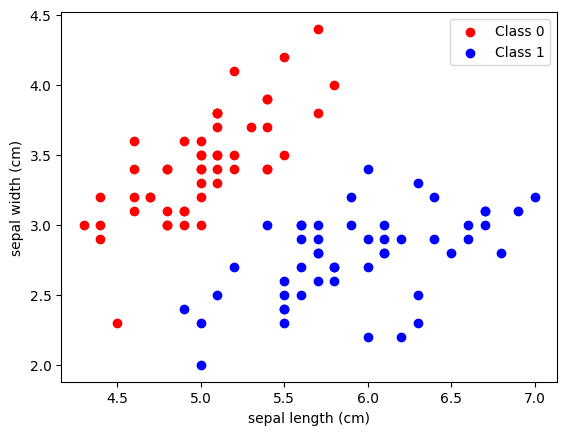

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()

plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [17]:
# Train the SVM with the default value of parameter C
svm_default = SVC(kernel='linear')
svm_default.fit(X_train, y_train)
score_default = svm_default.score(X_test, y_test)

# Train the SVM with parameter C = 200
svm_C200 = SVC(kernel='linear', C=200)
svm_C200.fit(X_train, y_train)
score_C200 = svm_C200.score(X_test, y_test)

# Print of scores :
print(f"default c : {score_default}")
print(f"C = 200 : {score_C200}")

default c : 1.0
C = 200 : 0.9666666666666667


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

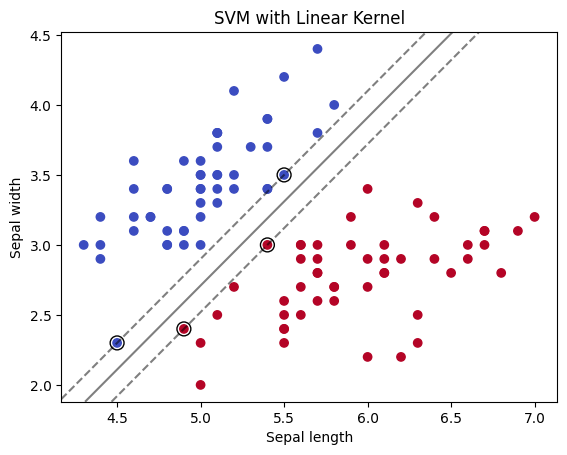

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Train the SVC model
model = SVC(kernel='linear', C=200)
model.fit(X, y)

# Get support vectors
support_vectors = model.support_vectors_

# Get coefficients (w) and intercept (b)
w = model.coef_[0]
b = model.intercept_[0]

# Function to plot decision line and margins
def plot_svc_decision_function(model, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate the model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # Plot decision line and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Mark support vectors
    ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

# Plot data and support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plot_svc_decision_function(model)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM with Linear Kernel')
plt.show()


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

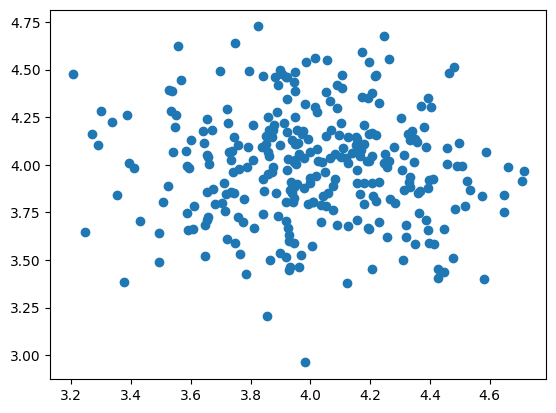

In [23]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

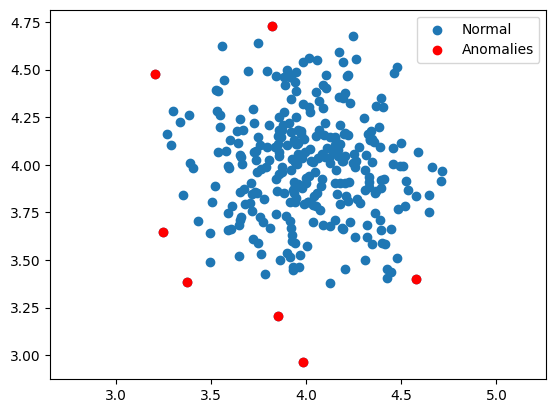

In [31]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1], label='Normal')
plt.scatter(values[:,0], values[:,1], color='red', label='Anomalies')
plt.axis('equal')
plt.legend()
plt.show()



Plot the support vectors:

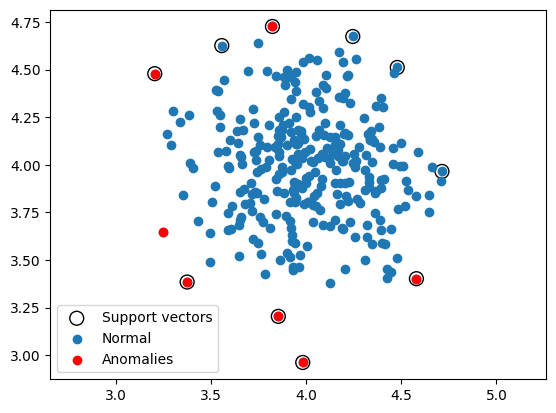

In [32]:
support_vectors = SVMmodelOne.support_vectors_

plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support vectors')

plt.scatter(x[:,0], x[:,1], label='Normal')
plt.scatter(values[:,0], values[:,1], color='red', label='Anomalies')
plt.axis('equal')
plt.legend()
plt.show()


What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


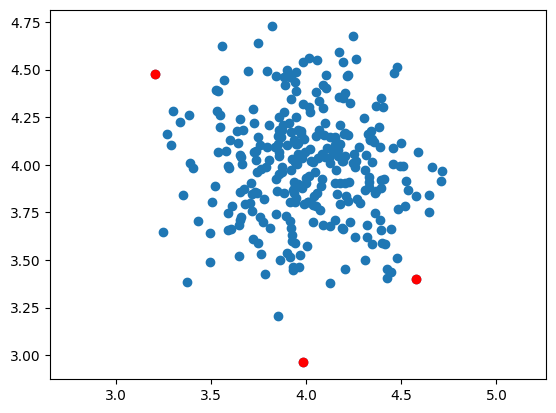

In [33]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()